In [19]:
import random
from music21 import note, stream, converter, environment
from PIL import Image
import os

#### Expanded pitches that can be used instead of what is in the /generate_random_note/ function

In [20]:
# Define the range of pitches and note durations
pitches = [
    'C3', 'C#3', 'Db3', 'D3', 'D#3', 'Eb3', 'E3', 'F3', 'F#3', 'Gb3', 'G3', 'G#3', 'Ab3', 'A3', 'A#3', 'Bb3', 'B3',
    'C4', 'C#4', 'Db4', 'D4', 'D#4', 'Eb4', 'E4', 'F4', 'F#4', 'Gb4', 'G4', 'G#4', 'Ab4', 'A4', 'A#4', 'Bb4', 'B4',
    'C5', 'C#5', 'Db5', 'D5', 'D#5', 'Eb5', 'E5'
]
durations = ['whole', 'half', 'quarter', 'eighth', '16th']


# Create a way to generate music

## Generate Synthetic MusicXML

In [27]:
from music21 import stream, note, duration, pitch, metadata, clef
import os
import random
import warnings
from music21.musicxml import m21ToXml

# Suppress annoying MusicXMLWarning
warnings.filterwarnings("ignore", category=m21ToXml.MusicXMLWarning)

def generate_random_note():
    # Define a list of possible pitches and durations
    pitches = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5']
    durations = ['whole', 'half', 'quarter', 'eighth', '16th']

    # Select a random pitch and duration
    selected_pitch = random.choice(pitches)
    selected_duration = random.choice(durations)

    # Create and return a music21 note
    n = note.Note()
    n.pitch = pitch.Pitch(selected_pitch)
    n.duration = duration.Duration(selected_duration)
    return n


def generate_synthetic_musicxml(num_samples=10, output_folder='../raw_data/generated_music'):
    # check for output - Use this for .py
        # output_folder = os.path.join(os.path.dirname(__file__), os.pardir, 'musicxml_files')
        # if not os.path.exists(output_folder):
        #     os.makedirs(output_folder)

    #for our notebook since __file__ seems to not work
    current_dir = os.getcwd()
    output_folder = os.path.abspath(os.path.join(current_dir, output_folder))
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    synthetic_data = []

    for i in range(num_samples):
        m = stream.Measure()
        total_duration = 0.0    # we are using a 4/4 measure

        # build out the measure
        while total_duration < 4.0:
            n = generate_random_note()
            if total_duration + n.duration.quarterLength <= 4.0:
                m.append(n)
                total_duration += n.duration.quarterLength
            else:
                break

        # create the score and append the measure
        s = stream.Score()
        s.append(m)
        s.metadata = metadata.Metadata()
        s.metadata.title = ''

        # write the score to MusicXML
        s.write('musicxml', fp=f'{output_folder}/sheet_{i}.musicxml')
        synthetic_data.append(s)

    return synthetic_data

In [25]:
synthetic_data = generate_synthetic_musicxml()


## Convert the XML score to a PNG image file


In [5]:
import subprocess
import platform
import os


# get the right path for musescore based on system
def get_musescore_path():
    system = platform.system()
    if system == 'Windows':
        return r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe'  # Update this path if necessary
    elif system == 'Darwin':  # macOS
        return '/Applications/MuseScore 4.app/Contents/MacOS/mscore'
    elif system == 'Linux':
        return '/usr/bin/musescore4'  # Update this path if necessary
    else:
        raise ValueError("Unsupported operating system")


def convert_musicxml_to_png(input_folder='../raw_data/generated_music', output_folder='../raw_data/sheet_images'):
    current_dir = os.getcwd()
    input_folder = os.path.abspath(os.path.join(current_dir, input_folder))
    output_folder = os.path.abspath(os.path.join(current_dir, output_folder))
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    musescore_path = get_musescore_path()

    for file_name in os.listdir(input_folder):
        if file_name.endswith('.musicxml'):
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name.replace('.musicxml', '.png'))
            result = subprocess.run([musescore_path, input_path, '-o', output_path], stderr=subprocess.PIPE)
            if result.returncode != 0:
                # Handle or log the error if needed
                print(f"Error processing {file_name}: {result.stderr.decode('utf-8')}")

    return None

In [26]:
convert_musicxml_to_png()

## Generate Labels for the Y 


In [29]:
import json
import os

def generate_labels(synthetic_data, output_folder='../data/labels'):
    current_dir = os.getcwd()
    output_folder = os.path.abspath(os.path.join(current_dir, output_folder))
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i, s in enumerate(synthetic_data):
        labels = {"symbols": []}
        for element in s.notes:
            labels["symbols"].append({
                "type": element.duration.type,
                "pitch": element.pitch.nameWithOctave,
                "position": [element.offset, 0]  # Simplified position
            })
        with open(f'{output_folder}/label_{i}.json', 'w') as f:
            json.dump(labels, f, indent=4)


In [30]:
# Generate labels for the synthetic data
generate_labels(synthetic_data)

In [31]:
import pandas as pd

df = pd.read_json('../data/labels/label_0.json')
df

,symbols
0,"{'type': 'eighth', 'pitch': 'B4', 'position': ..."
1,"{'type': 'whole', 'pitch': 'A4', 'position': [..."
2,"{'type': '16th', 'pitch': 'C5', 'position': [4..."
3,"{'type': 'half', 'pitch': 'D4', 'position': [4..."
4,"{'type': '16th', 'pitch': 'C4', 'position': [6..."
5,"{'type': '16th', 'pitch': 'D4', 'position': [7..."
6,"{'type': 'whole', 'pitch': 'E4', 'position': [..."
7,"{'type': 'quarter', 'pitch': 'F4', 'position':..."
8,"{'type': 'eighth', 'pitch': 'F4', 'position': ..."
9,"{'type': 'whole', 'pitch': 'D4', 'position': [..."


In [32]:
def load_labels_to_dataframe(label_folder):
    label_data = []
    for file_name in os.listdir(label_folder):
        if file_name.endswith('.json'):
            with open(os.path.join(label_folder, file_name), 'r') as f:
                data = json.load(f)
                for symbol in data['symbols']:
                    label_data.append({
                        'file_name': file_name,
                        'pitch': symbol['pitch'],
                        'type': symbol['type'],
                        'position': symbol['position']
                    })
    return pd.DataFrame(label_data)

In [33]:
labels_df = load_labels_to_dataframe('../data/labels')
labels_df

,file_name,pitch,type,position
0,label_6.json,G4,whole,"[0.0, 0]"
1,label_6.json,A4,quarter,"[4.0, 0]"
2,label_6.json,F4,quarter,"[5.0, 0]"
3,label_6.json,C5,whole,"[6.0, 0]"
4,label_6.json,C4,half,"[10.0, 0]"
...,...,...,...,...
295,label_9.json,D4,eighth,"[30.5, 0]"
296,label_9.json,D4,half,"[31.0, 0]"
297,label_9.json,B4,half,"[33.0, 0]"
298,label_9.json,C5,16th,"[35.0, 0]"


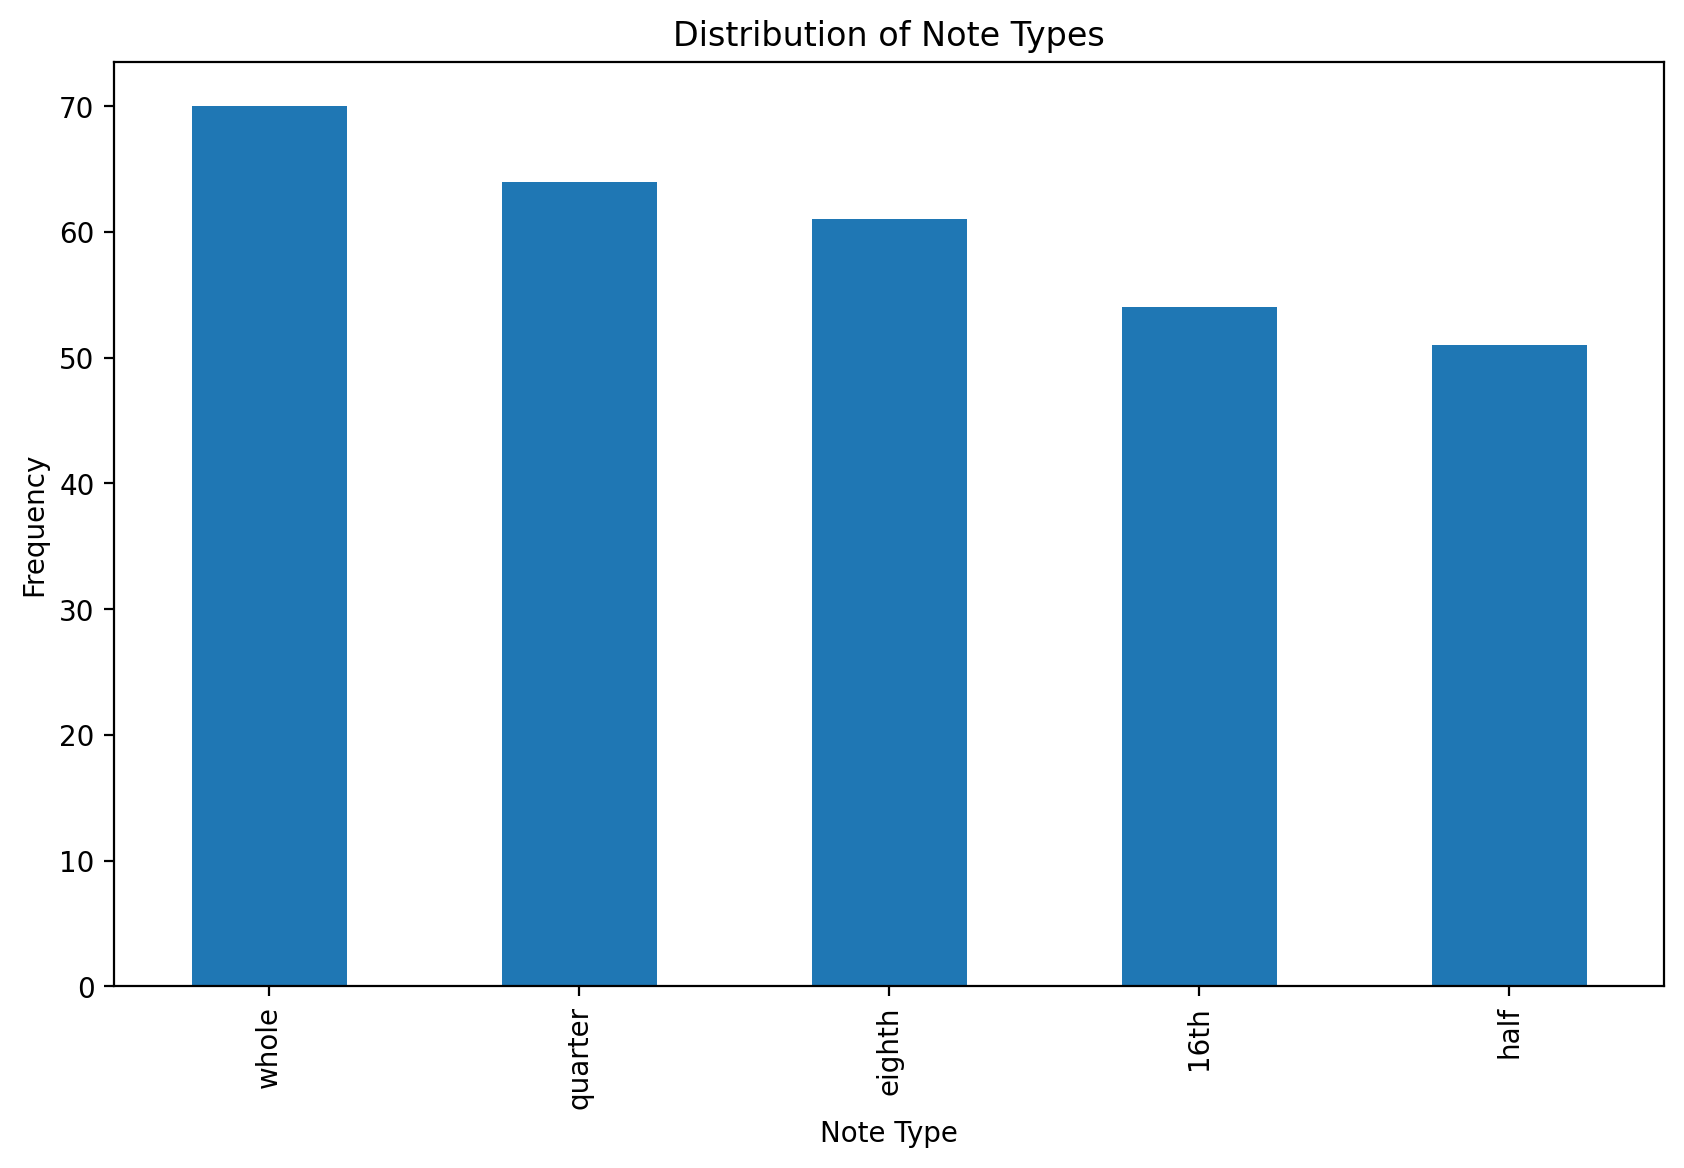

In [34]:
import matplotlib.pyplot as plt

# Plot the distribution of note types
plt.figure(figsize=(10, 6))
labels_df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Note Types')
plt.xlabel('Note Type')
plt.ylabel('Frequency')
plt.show()

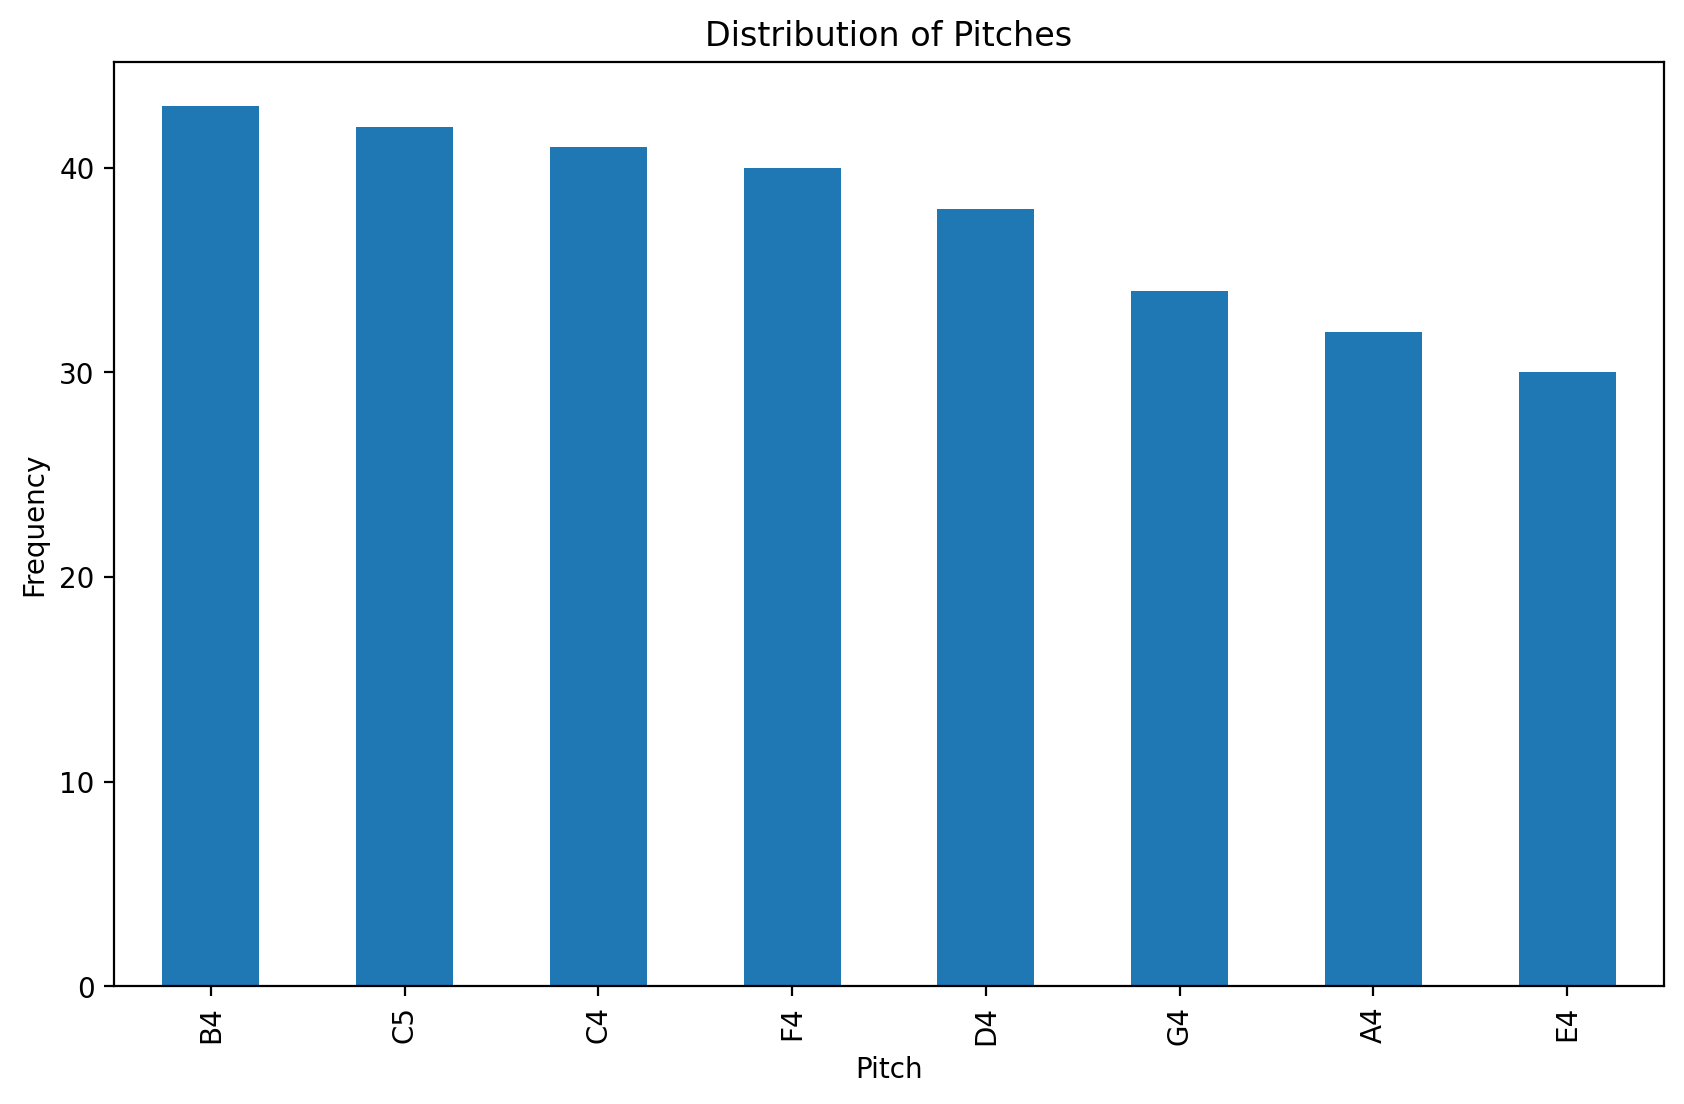

In [35]:
#Distribution of Pitches
plt.figure(figsize=(10, 6))
labels_df['pitch'].value_counts().plot(kind='bar')
plt.title('Distribution of Pitches')
plt.xlabel('Pitch')
plt.ylabel('Frequency')
plt.show()